# Regression Project

### Project Title: Analysing and Predicting Average Temperature From the Agri-food Sector

#### Done By: Sarah Mahlangu

© ExploreAI 2024

---

## Table of Contents

<a href=#one>1. Background Context</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Data Collection and Description</a>

<a href=#four>4. Loading Data </a>

<a href=#five>5. Data Cleaning and Filtering</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Data Transformation</a>

<a href=#eight>8. Modelling and Evaluation</a>
<ul>
    <li><a href="#eight-one">8.1. Linear Regression</a>
    <li><a href="#eight-two">8.2. Random Forest Regression</a>
    <li><a href="#eight-three">8.3. Gradient Boosting Regression (XGBoost)</a>
</ul>

<a href=#nine>9. Final Model</a>

<a href=#ten>10. Conclusion and Future Work</a>


---
 <a id="one"></a>
## **1. Background Context**
<a href=#cont>Back to Table of Contents</a>
* **Objective of the Project:** 

    The aim of this project is to analyse and predict average temperature from the agri-food sector, using data from the FAO and IPCC, to understand climate impacts and develop sustainable strategies for stakeholders including policymakers and agricultural businesses.


* **Project Purpose:** 

     The purpose of this project is to analyze and predict average temperatures specifically in the agri-food sector. By leveraging data from the FAO (Food and Agriculture Organization) and the IPCC (Intergovernmental Panel on Climate Change), the project aims to gain deeper insights into how climate impacts influence the agricultural industry. The objective is to help develop sustainable strategies that can be used by policymakers and agricultural businesses to mitigate risks associated with climate change and enhance agricultural productivity and sustainability

* **Data Source:** 

    The project utilizes data from internationally recognized organizations like FAO and IPCC, ensuring reliable and comprehensive climate and agricultural data. The dataset contains CO2 emissions data from various agricultural activities, demographic information, and average temperature increases for different regions spanning 30 years, from 1990 to 2020.

---
<a href=#two></a>
## **2. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

---

In [52]:
# Import packages

import pickle                                                                            
import seaborn                                     
from sklearn import metrics                        
import statsmodels.api as sm                        
from sklearn.pipeline import make_pipeline         
from sklearn.tree import DecisionTreeRegressor     
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd                                 
import numpy as np  
from scipy import stats
import matplotlib.pyplot as plt                    
import seaborn as sns                              
import warnings                                                     
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')  
pd.set_option("display.max_columns", None)

---
<a href=#three></a>
## **3. Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

---

### Dataset overview:

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC. These datasets were, cleaned, preprocessed and merged together to create a comprehensive and cohesive dataset for analysis and forecasting purposes.

The dataset, as demonstrated in the notebook, describes CO2 emissions related to agri-food, which amount to approximately 62% of the global annual emissions. Indeed, the emissions from the agri-food sector are significant when studying climate change. As the dataset shows, these emissions contribute to a substantial portion of the global annual emissions. Understanding and addressing the environmental impact of the agri-food industry is crucial for mitigating climate change and developing sustainable practices within this sector.

#### Dataset features:

- **Area**: Country.
- **Year**: Year of study.
- **Savanna fires**: Emissions from fires in savanna ecosystems.
- **Forest fires**: Emissions from fires in forested areas.
- **Crop Residues**: Emissions from burning or decomposing leftover plant material after crop harvesting.
- **Rice Cultivation**: Emissions from methane released during rice cultivation.
- **Drained organic soils (CO2)**: Emissions from carbon dioxide released when draining organic soils.
- **Pesticides Manufacturing**: Emissions from the production of pesticides.
- **Food Transport**: Emissions from transporting food products.
- **Forestland**: Land covered by forests.
- **Net Forest conversion**: Change in forest area due to deforestation and afforestation.
- **Food Household Consumption**: Emissions from food consumption at the household level.
- **Food Retail**: Emissions from the operation of retail establishments selling food.
- **On-farm Electricity Use**: Electricity consumption on farms.
- **Food Packaging**: Emissions from the production and disposal of food packaging materials.
- **Agrifood Systems Waste Disposal**: Emissions from waste disposal in the agrifood system.
- **Food Processing**: Emissions from processing food products.
- **Fertilizers Manufacturing**: Emissions from the production of fertilizers.
- **IPPU**: Emissions from industrial processes and product use.
- **Manure applied to Soils**: Emissions from applying animal manure to agricultural soils.
- **Manure left on Pasture**: Emissions from animal manure on pasture or grazing land.
- **Manure Management**: Emissions from managing and treating animal manure.
- **Fires in organic soils**: Emissions from fires in organic soils.
- **Fires in humid tropical forests**: Emissions from fires in humid tropical forests.
- **On-farm energy use**: Energy consumption on farms.
- **Rural population**: Number of people living in rural areas.
- **Urban population**: Number of people living in urban areas.
- **Total Population - Male**: Total number of male individuals in the population.
- **Total Population - Female**: Total number of female individuals in the population.
- **Total_emission**: Total greenhouse gas emissions from various sources.
- **Average Temperature °C**: The average increasing of temperature (by year) in degrees Celsius.

Average temperature is the target variable in this dataset. 

---
<a href=#four></a>
## **4. Loading Data**
<a href=#cont>Back to Table of Contents</a>


---

In [4]:
# Load co2 emissions dataset using pandas and view first few rows 

df = pd.read_csv('co2_emissions_from_agri.csv')
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  Net Forest conversion  \
0         63.1152   -2388.803                    0.0   
1         61.2125   -2388.803                    0.0   
2         53.3170   -2388.803                    0.0   
3         54.3617   -2388.803                    0.0   
4         53.9874   -2388.803                    0.0   

   Food Household Consumption  Food Retail  On-farm Electricity Use  \
0                     79.0851     109.6446                  14.2666   
1                     80.4885     116.6789                  11.4182   
2                     80.7692     126.1721                   9.2752   
3                     85.0678      81.4607                   9.0635   
4                     88.8058      90.4008                   8.3962   

   Food Packaging  Agrifood Systems Waste Disposal  Food Processing  \
0       67.631366                         691.7888        252.21419   
1       67.631366                         710.8212        252.21419   
2       67.631366                         743.6751        252.21419   
3       67.631366                         791.9246        252.21419   
4       67.631366                         831.9181        252.21419   

   Fertilizers Manufacturing      IPPU  Manure applied to Soils  \
0                    11.9970  209.9778                 260.1431   
1                    12.8539  217.0388                 268.6292   
2                    13.4929  222.1156                 264.7898   
3                    14.0559  201.2057                 261.7221   
4                    15.1269  182.2905                 267.6219   

   Manure left on Pasture  Manure Management  Fires in organic soils  \
0               1590.5319           319.1763                     0.0   
1               1657.2364           342.3079                     0.0   
2               1653.5068           349.1224                     0.0   
3               1642.9623           352.2947                     0.0   
4               1689.3593           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529    

---
<a href=#five></a>
## **5. Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

---

In [6]:
# Display number of rows and columns in the dataset

df.shape

(6965, 31)

The dataset contains 6965 rows and 31 columns

In [8]:
# Check data types and null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

Area is the only categorical feature in the dataset and some of the numerical columns have null values that have to be dealt with.

In [10]:
# Change column names

def change_column_names(columns):
    
    # Initialize empty list
    changed_cols = []

    # Apply lower function and replace spaces and other characters in each column
    for col in columns:
        col = col.lower().replace(" ", "_").replace("(", "").replace(")", "").replace("-", "").replace("__", "_").replace(".", "").replace("'", "").replace(",", "")
       
        # Append each changed column to list
        changed_cols.append(col)
        
    return changed_cols

# Apply function to dataframe

df.columns = change_column_names(df.columns)
df.head()

area  year  savanna_fires  forest_fires  crop_residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   rice_cultivation  drained_organic_soils_co2  pesticides_manufacturing  \
0            686.00                        0.0                 11.807483   
1            678.16                        0.0                 11.712073   
2            686.00                        0.0                 11.712073   
3            686.00                        0.0                 11.712073   
4            705.60                        0.0                 11.712073   

   food_transport  forestland  net_forest_conversion  \
0         63.1152   -2388.803                    0.0   
1         61.2125   -2388.803                    0.0   
2         53.3170   -2388.803                    0.0   
3         54.3617   -2388.803                    0.0   
4         53.9874   -2388.803                    0.0   

   food_household_consumption  food_retail  onfarm_electricity_use  \
0                     79.0851     109.6446                 14.2666   
1                     80.4885     116.6789                 11.4182   
2                     80.7692     126.1721                  9.2752   
3                     85.0678      81.4607                  9.0635   
4                     88.8058      90.4008                  8.3962   

   food_packaging  agrifood_systems_waste_disposal  food_processing  \
0       67.631366                         691.7888        252.21419   
1       67.631366                         710.8212        252.21419   
2       67.631366                         743.6751        252.21419   
3       67.631366                         791.9246        252.21419   
4       67.631366                         831.9181        252.21419   

   fertilizers_manufacturing      ippu  manure_applied_to_soils  \
0                    11.9970  209.9778                 260.1431   
1                    12.8539  217.0388                 268.6292   
2                    13.4929  222.1156                 264.7898   
3                    14.0559  201.2057                 261.7221   
4                    15.1269  182.2905                 267.6219   

   manure_left_on_pasture  manure_management  fires_in_organic_soils  \
0               1590.5319           319.1763                     0.0   
1               1657.2364           342.3079                     0.0   
2               1653.5068           349.1224                     0.0   
3               1642.9623           352.2947                     0.0   
4               1689.3593           367.6784                     0.0   

   fires_in_humid_tropical_forests  onfarm_energy_use  rural_population  \
0                              0.0                NaN         9655167.0   
1                              0.0                NaN        10230490.0   
2                              0.0                NaN        10995568.0   
3                              0.0                NaN        11858090.0   
4                              0.0                NaN        12690115.0   

   urban_population  total_population_male  total_population_female  \
0         2593947.0              5348387.0                5346409.0   
1         2763167.0              5372959.0                5372208.0   
2         2985663.0              6028494.0                6028939.0   
3         3237009.0              7003641.0                7000119.0   
4         3482604.0              7733458.0                7722096.0   

   total_emission  average_temperature_°c  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729        

In [12]:
# Determine percentage of nulls in each column

null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

area                                0.000000
year                                0.000000
savanna_fires                       0.445083
forest_fires                        1.335248
crop_residues                      19.942570
rice_cultivation                    0.000000
drained_organic_soils_co2           0.000000
pesticides_manufacturing            0.000000
food_transport                      0.000000
forestland                          7.078248
net_forest_conversion               7.078248
food_household_consumption          6.791098
food_retail                         0.000000
onfarm_electricity_use              0.000000
food_packaging                      0.000000
agrifood_systems_waste_disposal     0.000000
food_processing                     0.000000
fertilizers_manufacturing           0.000000
ippu                               10.667624
manure_applied_to_soils            13.323762
manure_left_on_pasture              0.000000
manure_management                  13.323762
fires_in_o

All the columns have null percentages less than 20%. Since the null percentages are moderate. All nulls will be imputed.

In [14]:
# Impute columns with nulls using the mean

df = df.apply(lambda col: col.fillna(col.mean()) if col.isnull().any() else col)

# Display the result
df.head()

area  year  savanna_fires  forest_fires  crop_residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   rice_cultivation  drained_organic_soils_co2  pesticides_manufacturing  \
0            686.00                        0.0                 11.807483   
1            678.16                        0.0                 11.712073   
2            686.00                        0.0                 11.712073   
3            686.00                        0.0                 11.712073   
4            705.60                        0.0                 11.712073   

   food_transport  forestland  net_forest_conversion  \
0         63.1152   -2388.803                    0.0   
1         61.2125   -2388.803                    0.0   
2         53.3170   -2388.803                    0.0   
3         54.3617   -2388.803                    0.0   
4         53.9874   -2388.803                    0.0   

   food_household_consumption  food_retail  onfarm_electricity_use  \
0                     79.0851     109.6446                 14.2666   
1                     80.4885     116.6789                 11.4182   
2                     80.7692     126.1721                  9.2752   
3                     85.0678      81.4607                  9.0635   
4                     88.8058      90.4008                  8.3962   

   food_packaging  agrifood_systems_waste_disposal  food_processing  \
0       67.631366                         691.7888        252.21419   
1       67.631366                         710.8212        252.21419   
2       67.631366                         743.6751        252.21419   
3       67.631366                         791.9246        252.21419   
4       67.631366                         831.9181        252.21419   

   fertilizers_manufacturing      ippu  manure_applied_to_soils  \
0                    11.9970  209.9778                 260.1431   
1                    12.8539  217.0388                 268.6292   
2                    13.4929  222.1156                 264.7898   
3                    14.0559  201.2057                 261.7221   
4                    15.1269  182.2905                 267.6219   

   manure_left_on_pasture  manure_management  fires_in_organic_soils  \
0               1590.5319           319.1763                     0.0   
1               1657.2364           342.3079                     0.0   
2               1653.5068           349.1224                     0.0   
3               1642.9623           352.2947                     0.0   
4               1689.3593           367.6784                     0.0   

   fires_in_humid_tropical_forests  onfarm_energy_use  rural_population  \
0                              0.0        3008.982252         9655167.0   
1                              0.0        3008.982252        10230490.0   
2                              0.0        3008.982252        10995568.0   
3                              0.0        3008.982252        11858090.0   
4                              0.0        3008.982252        12690115.0   

   urban_population  total_population_male  total_population_female  \
0         2593947.0              5348387.0                5346409.0   
1         2763167.0              5372959.0                5372208.0   
2         2985663.0              6028494.0                6028939.0   
3         3237009.0              7003641.0                7000119.0   
4         3482604.0              7733458.0                7722096.0   

   total_emission  average_temperature_°c  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729        

In [16]:
# Column that all nulls have been imputed

df.isna().sum()

area                               0
year                               0
savanna_fires                      0
forest_fires                       0
crop_residues                      0
rice_cultivation                   0
drained_organic_soils_co2          0
pesticides_manufacturing           0
food_transport                     0
forestland                         0
net_forest_conversion              0
food_household_consumption         0
food_retail                        0
onfarm_electricity_use             0
food_packaging                     0
agrifood_systems_waste_disposal    0
food_processing                    0
fertilizers_manufacturing          0
ippu                               0
manure_applied_to_soils            0
manure_left_on_pasture             0
manure_management                  0
fires_in_organic_soils             0
fires_in_humid_tropical_forests    0
onfarm_energy_use                  0
rural_population                   0
urban_population                   0
t

All columns containing nulls have been successfully imputed.

In [18]:
# Find duplicates

num_duplicates = df.duplicated().sum()
num_duplicates

0

There are no duplicated rows.

In [20]:
# Count number of unique areas

df['area'].nunique()

236

There are 236 unique countries in the dataset. Encoding the area feature might increase complexity without improving predictive power, hence this column will be removed from model predictors.

In [22]:
# Detecting outliers in numerical columns based on the z-score method

# Select numeric columns
numeric_columns = df.select_dtypes(include = 'number')

In [24]:
# calculate zscores
zscores = np.abs(stats.zscore(numeric_columns))

# Filter zscores > 3
outliers = numeric_columns[(zscores > 3).any(axis=1)]

# Filter df with indices of outliers
df.loc[outliers.index]

area  year  savanna_fires  forest_fires  crop_residues  \
155   Angola  1990     25197.6220    15300.4301        32.3523   
156   Angola  1991     25197.6220    15300.4301        39.7935   
157   Angola  1992     25197.6220    15300.4301        43.6659   
158   Angola  1993     25197.6220    15300.4301        43.9124   
159   Angola  1994     25197.6220    15300.4301        49.1647   
...      ...   ...            ...           ...            ...   
6929  Zambia  2016     15155.6428    26865.5563       172.0801   
6930  Zambia  2017     13577.1825    26854.3922       218.4410   
6931  Zambia  2018     13846.0542    24609.2979       155.4773   
6932  Zambia  2019     14693.4332    23933.2234       134.7087   
6933  Zambia  2020     13655.6268    21465.8081       205.7266   

      rice_cultivation  drained_organic_soils_co2  pesticides_manufacturing  \
155            24.7274                   346.4974                       1.0   
156            31.3600                   346.4974                       1.0   
157            34.3000                   346.4974                       0.0   
158            39.2000                   346.4974                       3.0   
159           188.1600                   346.4974                       0.0   
...                ...                        ...                       ...   
6929           43.2905                 14465.5896                      63.0   
6930           57.9670                 14457.3172                      74.0   
6931           59.3821                 14464.0570                      75.0   
6932           48.1690                 14554.7252                      75.0   
6933           48.5218                 14566.6658                      75.0   

      food_transport  forestland  net_forest_conversion  \
155         100.0467         0.0              9847.2211   
156          98.6277         0.0              9847.2211   
157         102.1643         0.0              9847.2211   
158         123.2375         0.0              9847.2211   
159         134.8715         0.0              9847.2211   
...              ...         ...                    ...   
6929        241.4879         0.0             19047.2568   
6930        238.5063         0.0             19047.2568   
6931        208.4653         0.0             19047.2568   
6932        237.7122         0.0             19047.2568   
6933        284.4390         0.0             19047.2568   

      food_household_consumption  food_retail  onfarm_electricity_use  \
155                      63.2208      52.6817               24.285117   
156                      56.7367      56.2461               24.285117   
157                      50.6410      48.1584               24.285117   
158                      48.5941      41.9589               23.948334   
159                     119.8165      38.6530               24.285117   
...                          ...          ...                     ...   
6929                     24.3120      19.7099               12.198000   
6930                     60.9657      28.0465               33.864300   
6931                     80.4523      35.0490               49.272600   
6932                     73.1923      28.0314               49.916100   
6933                     69.9292      32.5606               41.749100   

      food_packaging  agrifood_systems_waste_disposal  food_processing  \
155        67.631366                        1306.3437       209.587728   
156        67.631366                        1364.3574       209.587728   
157        67.631366                        1422.4346       209.587728   
158        67.631366                        1474.9174       209.587728   
159        67.631366                        1526.6197       209.587728   
...              ...                              ...              ...   
6929       41.992000                        1985.9202       150.573933   
6930       96.736100                        2012.0218       209.587728   
6931      128.

In [26]:
# Remove the outliers

# Filter rows where all z-scores are <= 3 (no outliers)
cleaned_df = df[(zscores <= 3).all(axis = 1)]

In [28]:
# Verify the dimensions before and after outlier removal

print("Original data shape:", df.shape)
print("Cleaned data shape:", cleaned_df.shape)

Original data shape: (6965, 31)
Cleaned data shape: (6403, 31)


562 rows of data have been identified to contain outliers and thus removed from the dataset. Regression models are particularly sensitive to outliers because they minimize the residual error. Outliers can disproportionately influence the slope and intercept of the model.

---
<a href=#six></a>
## **6. Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

---


In [30]:
# Summary statistics of the cleaned dataset

cleaned_df.describe()

year  savanna_fires  forest_fires  crop_residues  \
count  6403.000000    6403.000000   6403.000000    6403.000000   
mean   2005.050601     419.440799    275.557229     484.831460   
std       8.852267    1330.606427   1103.530791     649.346866   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      19.989750   
50%    2005.000000       0.880400      0.260400     172.680200   
75%    2013.000000      43.368750     33.403250     998.706309   
max    2020.000000   16743.811500  11892.454100    4246.321100   

       rice_cultivation  drained_organic_soils_co2  pesticides_manufacturing  \
count       6403.000000                6403.000000               6403.000000   
mean        2026.565869                1914.282293                127.709229   
std         5704.301295                5886.125721                326.840445   
min            0.000000                   0.000000                  0.000000   
25%          174.941550                   0.000000                  5.000000   
50%          474.320000                   0.000000                 12.232871   
75%         1410.445506                 403.215600                 90.000000   
max        53544.952300               43370.863200               4471.000000   

       food_transport     forestland  net_forest_conversion  \
count     6403.000000    6403.000000            6403.000000   
mean      1101.193884   -5390.079200            7489.338841   
std       2436.571468   15606.004632           17711.567274   
min          0.000100 -156527.706600               0.000000   
25%         25.576250   -4158.891000               0.000000   
50%        170.719000    -104.565700              66.660000   
75%        983.613300       0.000000            6626.620000   
max      17987.487000  171121.076000          142261.239100   

       food_household_consumption   food_retail  onfarm_electricity_use  \
count                  6403.00000   6403.000000             6403.000000   
mean                   1923.56864    959.786498              482.725579   
std                    4112.65467   2282.903168             1369.425244   
min                       0.00000      0.000000                0.000000   
25%                      12.84725     21.249550                7.616750   
50%                     189.64990    149.600000               24.285117   
75%                    1783.51210    870.723950              387.257639   
max                   36803.44490  26532.890200            20985.146300   

       food_packaging  agrifood_systems_waste_disposal  food_processing  \
count     6403.000000                      6403.000000      6403.000000   
mean       386.224844                      2635.115250      1564.410270   
std        871.384445                      5488.599265      5024.643968   
min          0.000000                         0.340000         0.000100   
25%         67.631366                        78.664850       209.587728   
50%         69.901897                       701.295800       331.114954   
75%        212.033652                      2531.755750       827.769850   
max       7911.634600                     60968.728000     62644.737400   

       fertilizers_manufacturing           ippu  manure_applied_to_soils  \
count                6403.000000    6403.000000              6403.000000   
mean                 1691.645778    7770.273131               480.564566   
std                  2003.892715   13854.676767               779.890808   
min                     0.001900       0.000000                 0.049000   
25%                   356.491017      44.928350                19.727200   
50%                  1104.726500    1120.032900               166.747800   
75%                  2012.447178   11229.203100               923.225603   
max                 23023.151900  147262.710200              6467.762300   

       manure_left_on_pasture  manure_management  fires_in_organic_soils  \
count            

 Emissions from industrial processes and product use and emissions from waste disposal in the agrifood systemhave the higest mean values.

### Histograms for numerical features

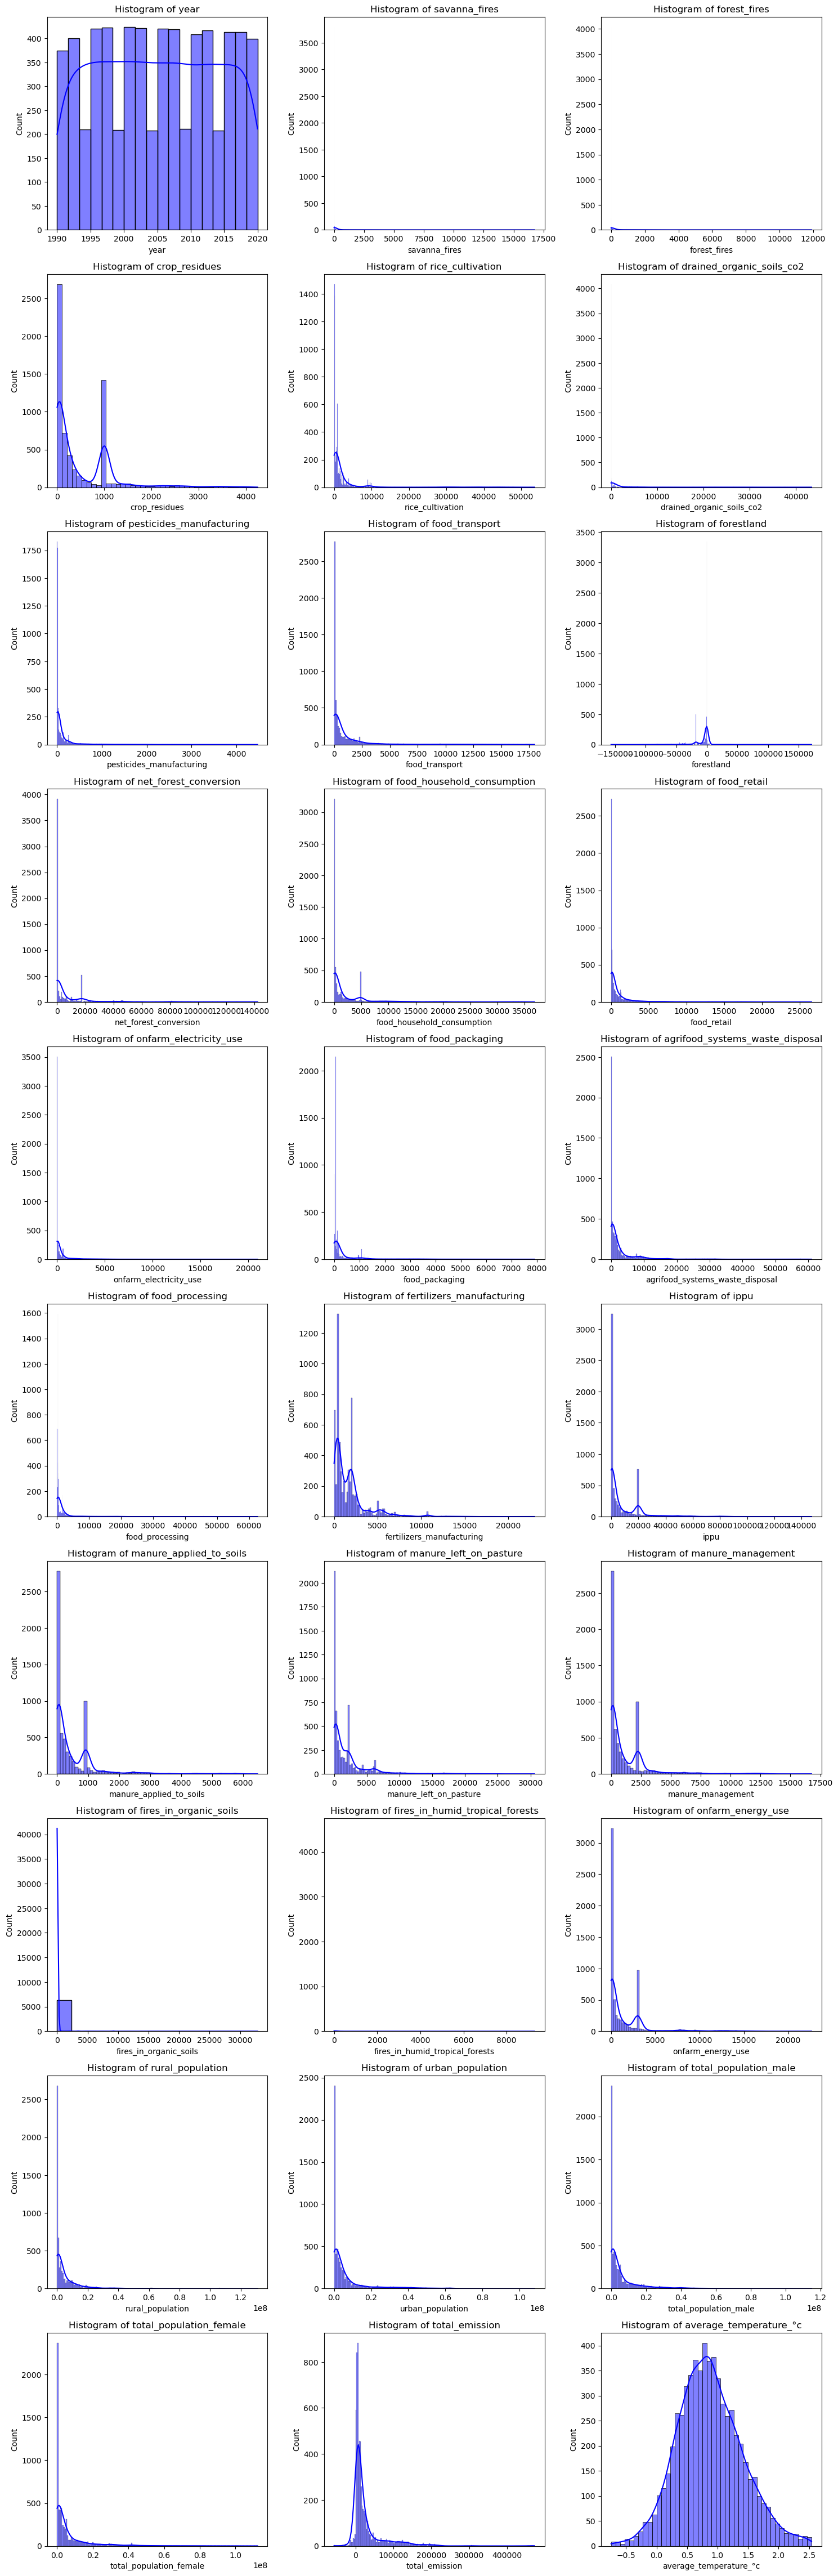

In [123]:
# Histograms for numerical columns

# Select numeric columns
numeric_columns = cleaned_df.select_dtypes(include = "number").columns

plt.figure(figsize = (15, 50))
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i + 1)
    sns.histplot(cleaned_df[col], kde = True, color = 'blue')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

#### Insights

Savanna fires: The distribution shows the frequency and intensity of savanna fires across different regions and years. 

Forest fires: Similar to savanna fires, this plot reveals the distribution of forest fire emissions, highlighting regions or years with higher occurrences.

Rice Cultivation: The plot for rice cultivation emissions shows how methane emissions are distributed, indicating common emission levels and outliers.

Drained organic soils (CO2): This plot helps understand the distribution of CO2 emissions from drained organic soils, showing typical emission levels and variability.

Forestland: The distribution of forestland values, including negative values indicating deforestation, can be observed.

Net Forest conversion: This plot shows the changes in forest area due to deforestation and afforestation, highlighting regions with significant changes.

Food Household Consumption: The distribution of emissions from household food consumption, indicating common levels and variability. total_emission: This plot provides an overall view of total emissions, showing the distribution and identifying regions or years with exceptionally high or low emissions. 

Average Temperature °C: The distribution of average temperature increases, helping to understand the variability and common temperature changes across regions and years.

### Emission sources

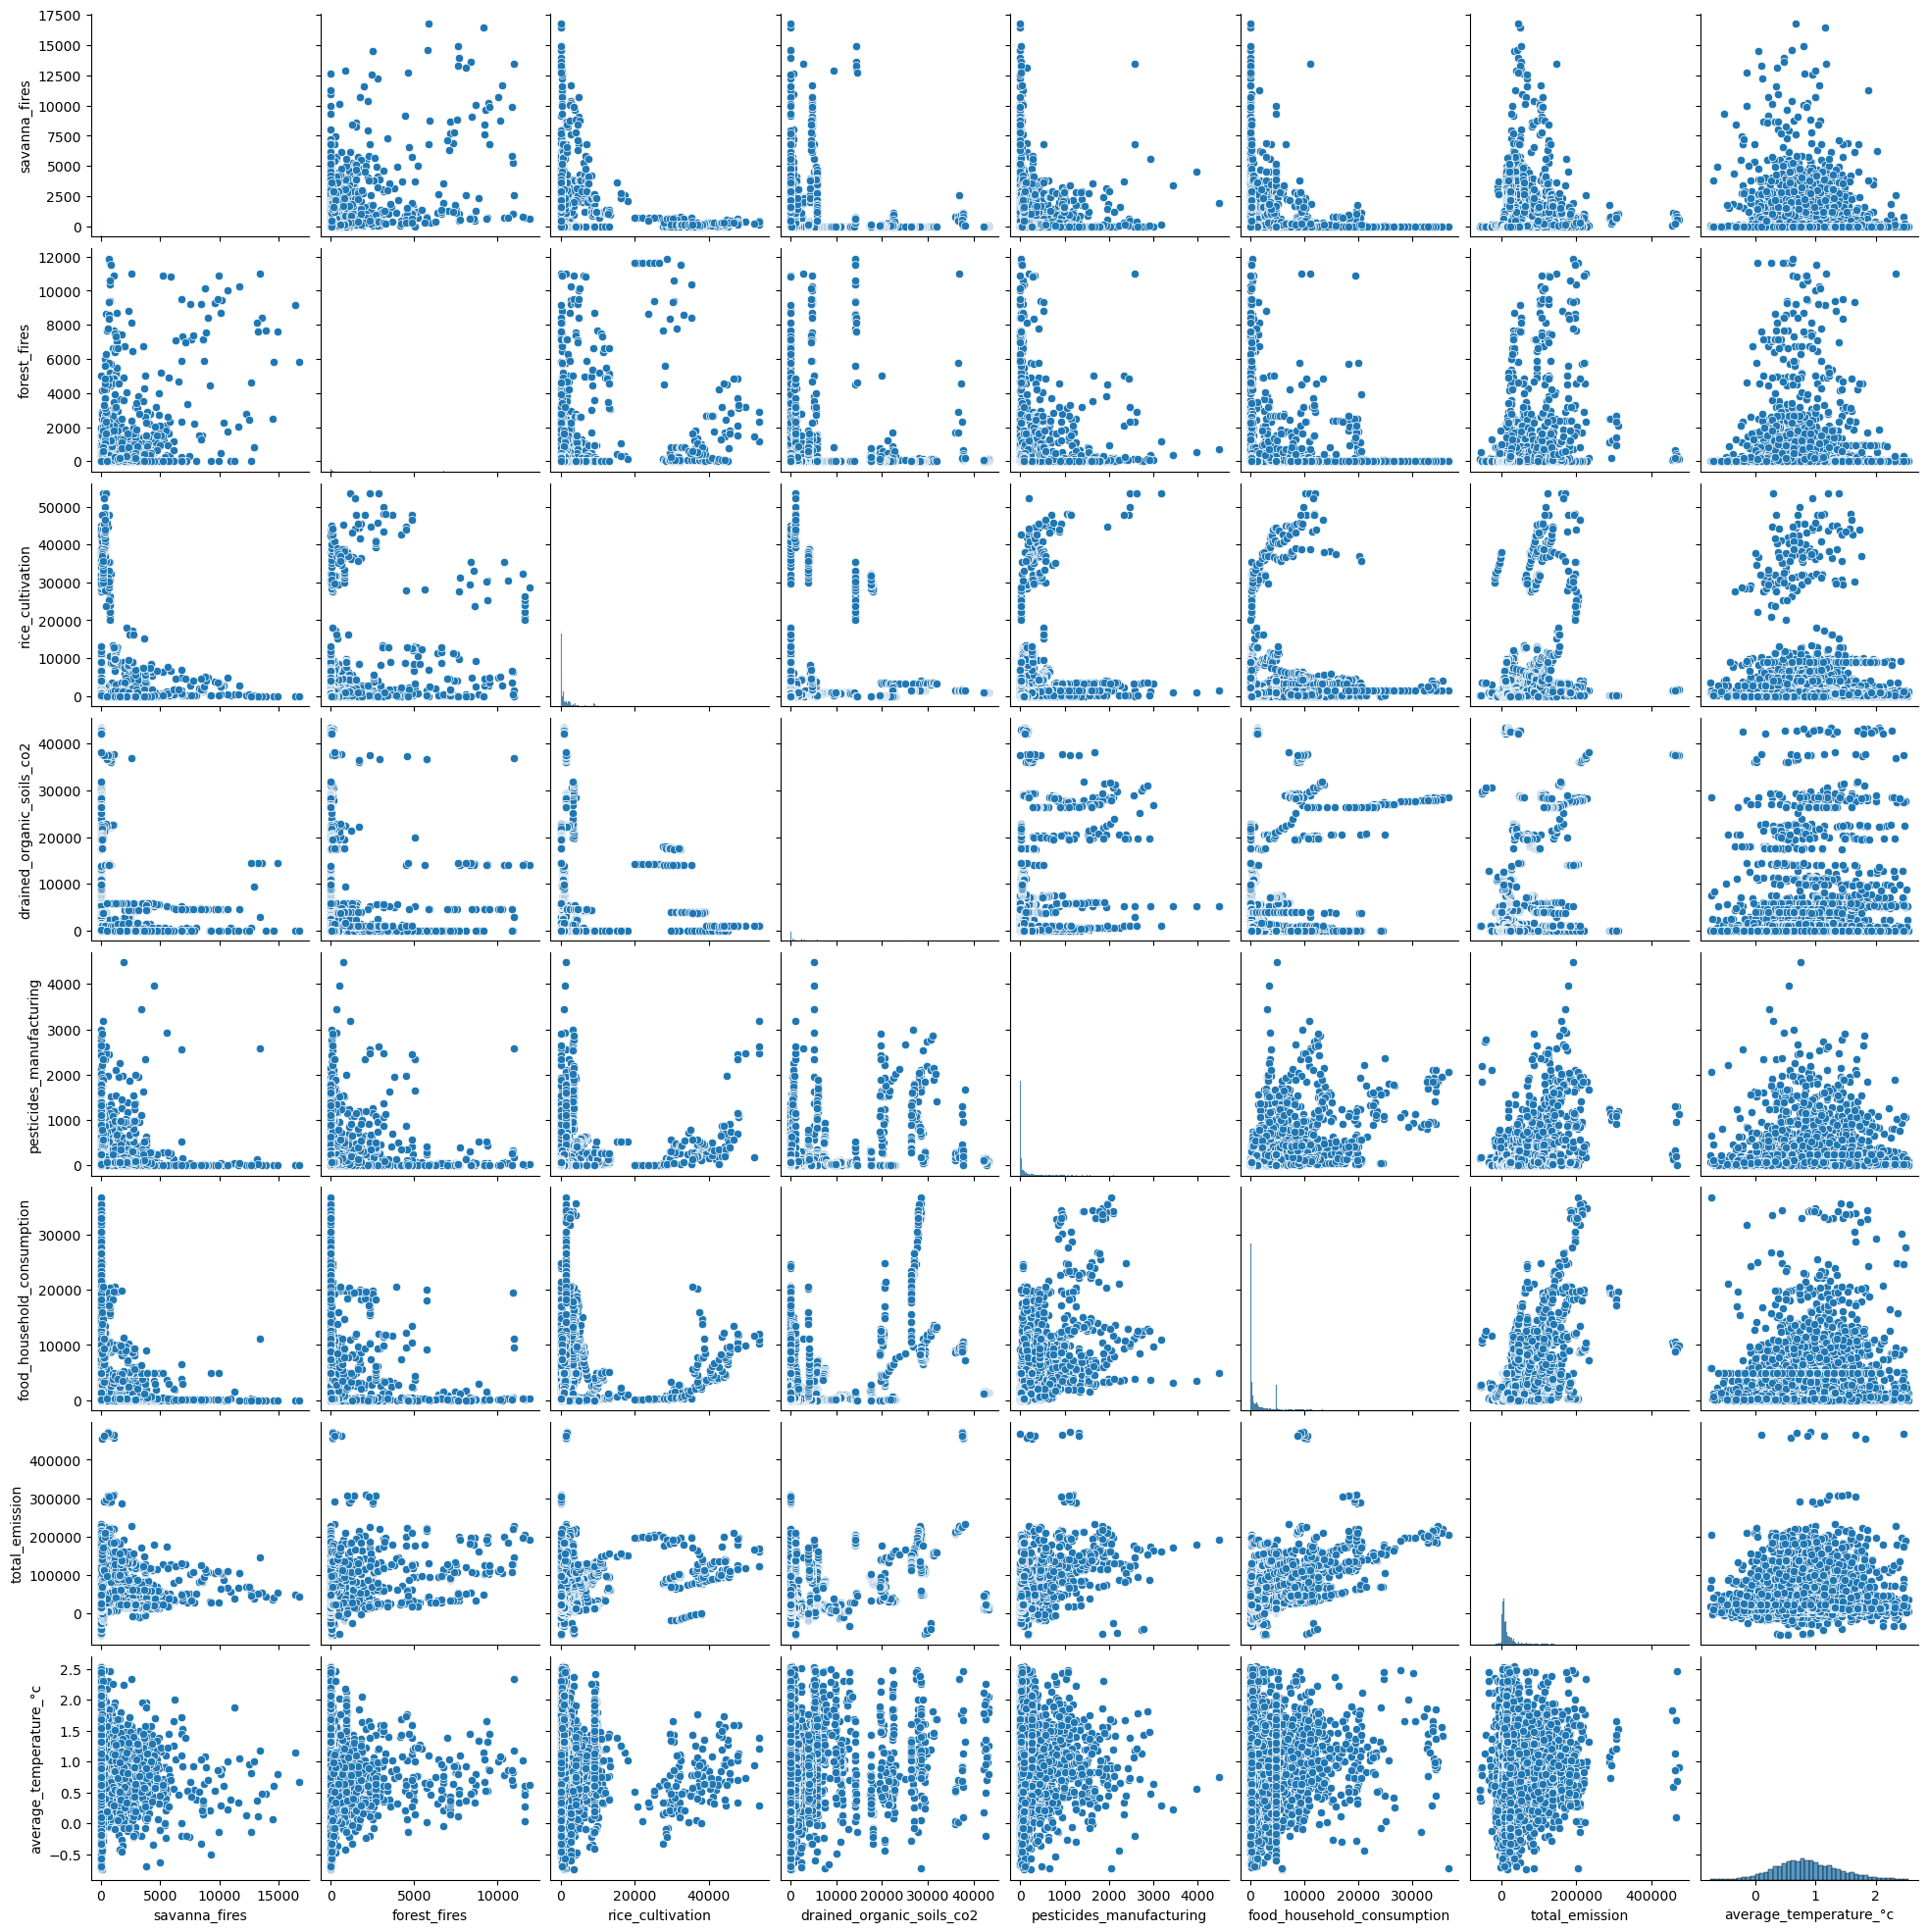

In [116]:
# Pair Plots
sns.pairplot(cleaned_df[['savanna_fires', 'forest_fires', 'rice_cultivation', 'drained_organic_soils_co2', 'pesticides_manufacturing', 'food_household_consumption', 'total_emission', 'average_temperature_°c']])
plt.show()

### Insights

Correlations:

High Correlation: Likely between fossil fuel consumption and total emissions, indicating direct influence.

Moderate Correlation: Potentially between forest fires and savanna fires, suggesting similar environmental influences.

Low Correlation: Between variables like pesticides manufacturing and rice cultivation, may show more independent trends.

Trends and Patterns:

Rising Temperatures: If average temperature shows positive correlation with emissions, it supports climate change impacts.

Environmental Impact: Relationships between agricultural practices and CO2 emissions highlight critical areas for sustainable practices.

Anomalies and Outliers:

Unusual Data Points: Scatter plots reveal outliers which could indicate rare events or data anomalies.

### Regional analysis

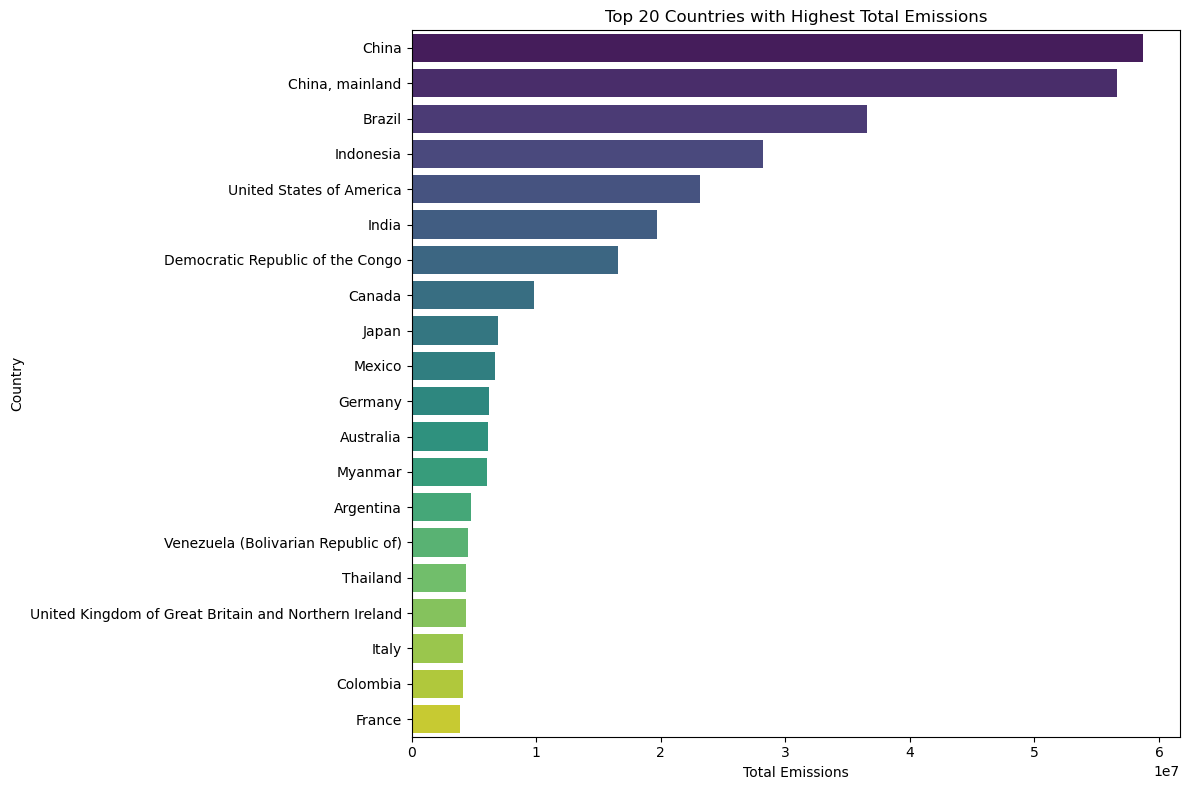

In [69]:
# Aggregate total emissions by country
country_emissions = df.groupby('area')['total_emission'].sum().reset_index()

# Sort countries by total emissions in descending order
country_emissions = country_emissions.sort_values(by = 'total_emission', ascending = False)

# Select the top 20 countries
top_20_countries = country_emissions.head(20)

# Set up the plot
plt.figure(figsize = (12, 8))
sns.barplot(x = 'total_emission', y = 'area', data = top_20_countries, palette = 'viridis')

# Customize the plot
plt.title('Top 20 Countries with Highest Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Insights

China stands out as the largest emitter with a significant lead over other countries. United States of America and India are also among the top contributors, following China. Other notable countries include Brazil, Indonesia, and Russia.

The list includes countries from various continents, indicating that emissions are a global issue. Both developed (e.g., USA, Japan, Germany) and developing countries (e.g., India, Brazil, Indonesia) are represented, reflecting different stages of industrialization and economic development.
A few countries account for a large proportion of global emissions. This suggests that efforts to reduce emissions in these key countries could significantly impact global emissions.

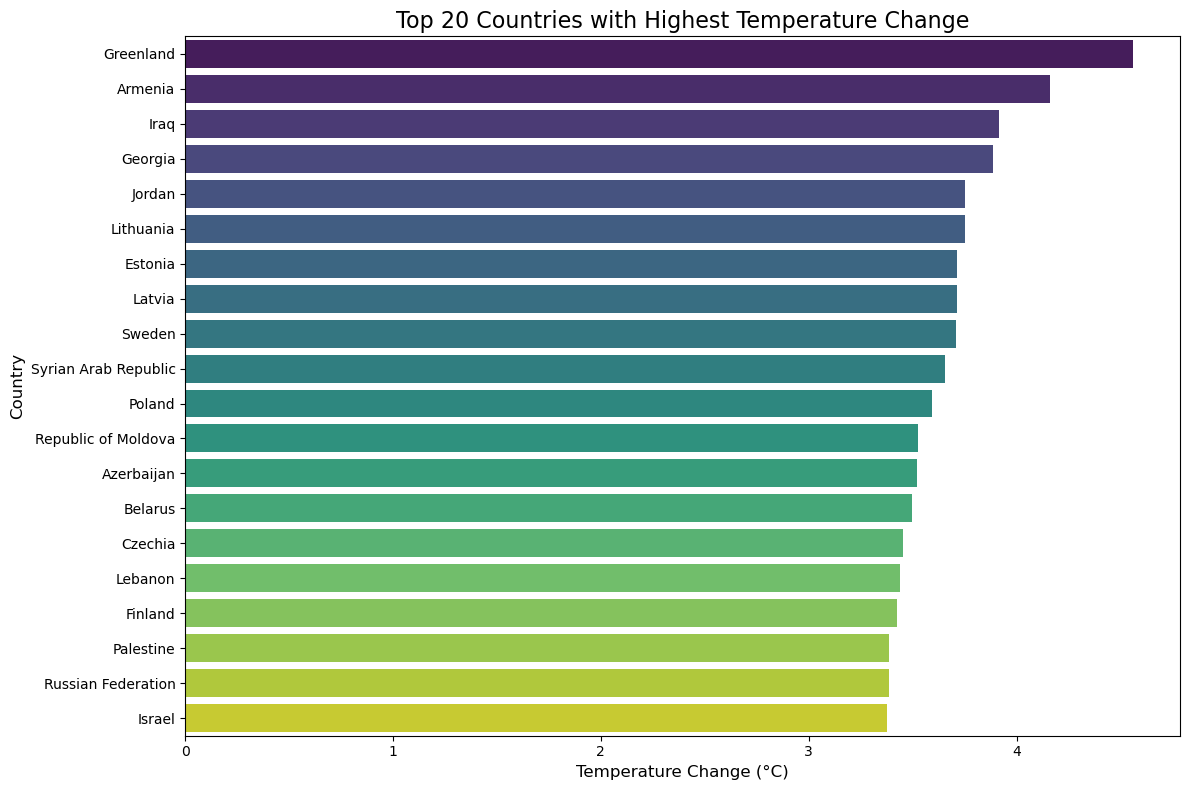

In [78]:
# Calculate the temperature change for each country
temperature_change = df.groupby('area')['average_temperature_°c'].agg(lambda x: x.max() - x.min()).reset_index()
temperature_change.rename(columns={'average_temperature_°c': 'temperature_change'}, inplace=True)

# Sort countries by temperature change in descending order
temperature_change = temperature_change.sort_values(by='temperature_change', ascending=False)

# Select the top 20 countries
top_20_temperature_change = temperature_change.head(20)

# Set up the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='temperature_change', y='area', data=top_20_temperature_change, palette='viridis')

# Customize the plot
plt.title('Top 20 Countries with Highest Temperature Change', fontsize=16)
plt.xlabel('Temperature Change (°C)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

### Insights

Greenland shows the highest temperature change, approaching 4°C. This is significantly higher than other countries, indicating severe climatic shifts. Armenia, Iraq, Georgia, Jordan, and Lithuania also show considerable temperature changes, all above 2.5°C. Most of the countries listed exhibit temperature changes close to or above 2°C, with several nearing 3°C.

Greenland’s high temperature change points to the intense effects of climate change in the Arctic region, which can lead to accelerated ice melt and rising sea levels. The countries experiencing high temperature changes are spread across different continents, including Europe (e.g., Lithuania, Estonia, Latvia), the Middle East (e.g., Iraq, Jordan), and Eastern Europe (e.g., Belarus, Poland). This suggests that the impacts of climate change are widespread and not confined to a single region.

### Over time trends

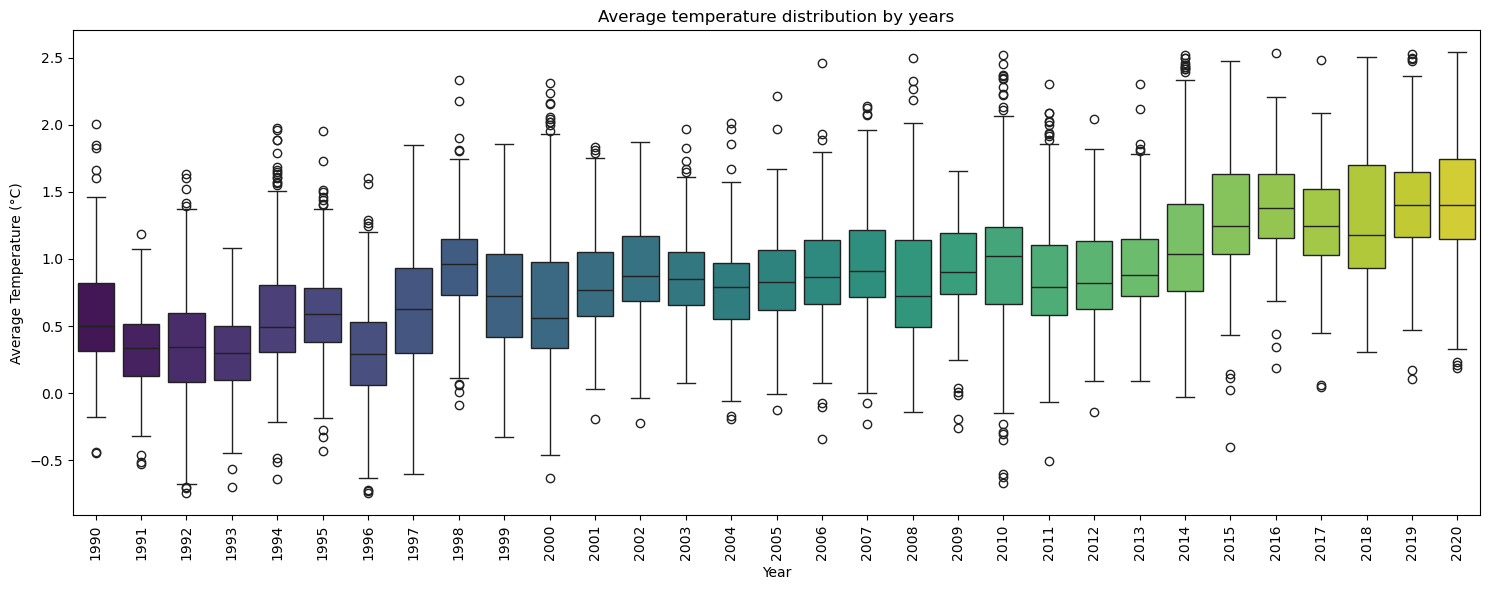

In [65]:
# Average temperature distribution over time

plt.figure(figsize = (15, 6))
sns.boxplot(x = "year", y = "average_temperature_°c", data = cleaned_df, palette = "viridis")
plt.title('Average temperature distribution by years')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#### Insights:

Rising Temperatures: The median temperature shows a gradual increase over the 30-year period. This suggests a warming trend, consistent with global climate change patterns.

Variability in Temperatures: The IQR and presence of outliers indicate fluctuations in temperature. Some years have higher variability, which could be due to extreme weather events or other anomalies.

Outliers: Outliers highlight years with extreme temperatures. Identifying these years can help understand specific events that caused significant deviations from the norm.

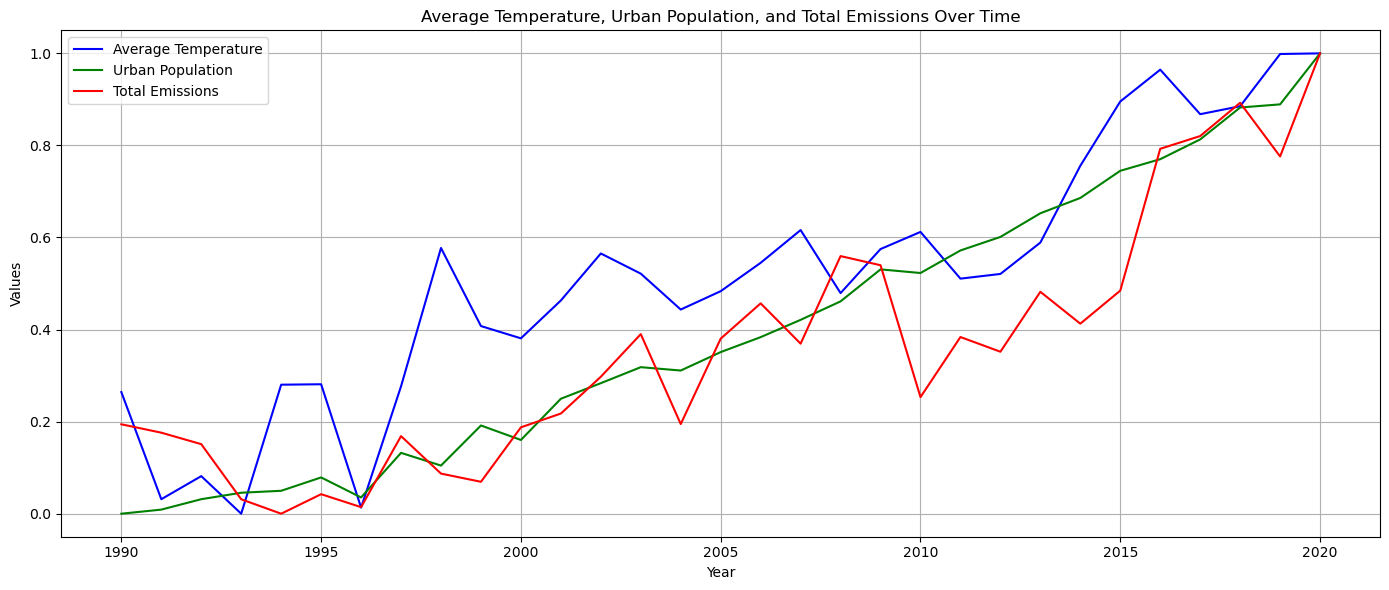

In [67]:
# Average Temperature, Urban Population, and Total Emissions Over Time

# Group by 'year' and calculate the mean for avg_temperature, sum for total_emissions, and mean for urban_population
aggregated_data = cleaned_df.groupby('year').agg({
    'average_temperature_°c': 'mean',  
    'urban_population': 'mean', 
    'total_emission': 'mean'}).reset_index()


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the relevant columns (excluding 'year')
aggregated_data[['average_temperature_°c', 'urban_population', 'total_emission']] = scaler.fit_transform(
    aggregated_data[['average_temperature_°c', 'urban_population', 'total_emission']]
)

# Set up the plot
plt.figure(figsize = (14, 6))
sns.lineplot(x='year', y='average_temperature_°c', data=aggregated_data, label='Average Temperature', color='blue')
sns.lineplot(x='year', y='urban_population', data=aggregated_data, label='Urban Population', color='green')
sns.lineplot(x='year', y='total_emission', data=aggregated_data, label='Total Emissions', color='red')
plt.title('Average Temperature, Urban Population, and Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Insights

Average Temperature: The blue line shows a generally increasing trend over the 30-year period. This suggests a rise in average temperatures, indicative of global warming and climate change.

Urban Population: The green line shows a steady and continuous increase over time. This reflects the growth of urban populations, possibly due to urbanization, economic development, and migration to cities.

Total Emissions: The red line also shows an increasing trend, with some variability. This indicates that total emissions have been rising, likely contributing to environmental issues such as air pollution and climate change.

Overall, there appears to be a correlation between the rise in urban population, total emissions, and average temperatures. As more people move to urban areas, the increase in emissions could be driving the rise in temperatures.

### Correlation heatmap

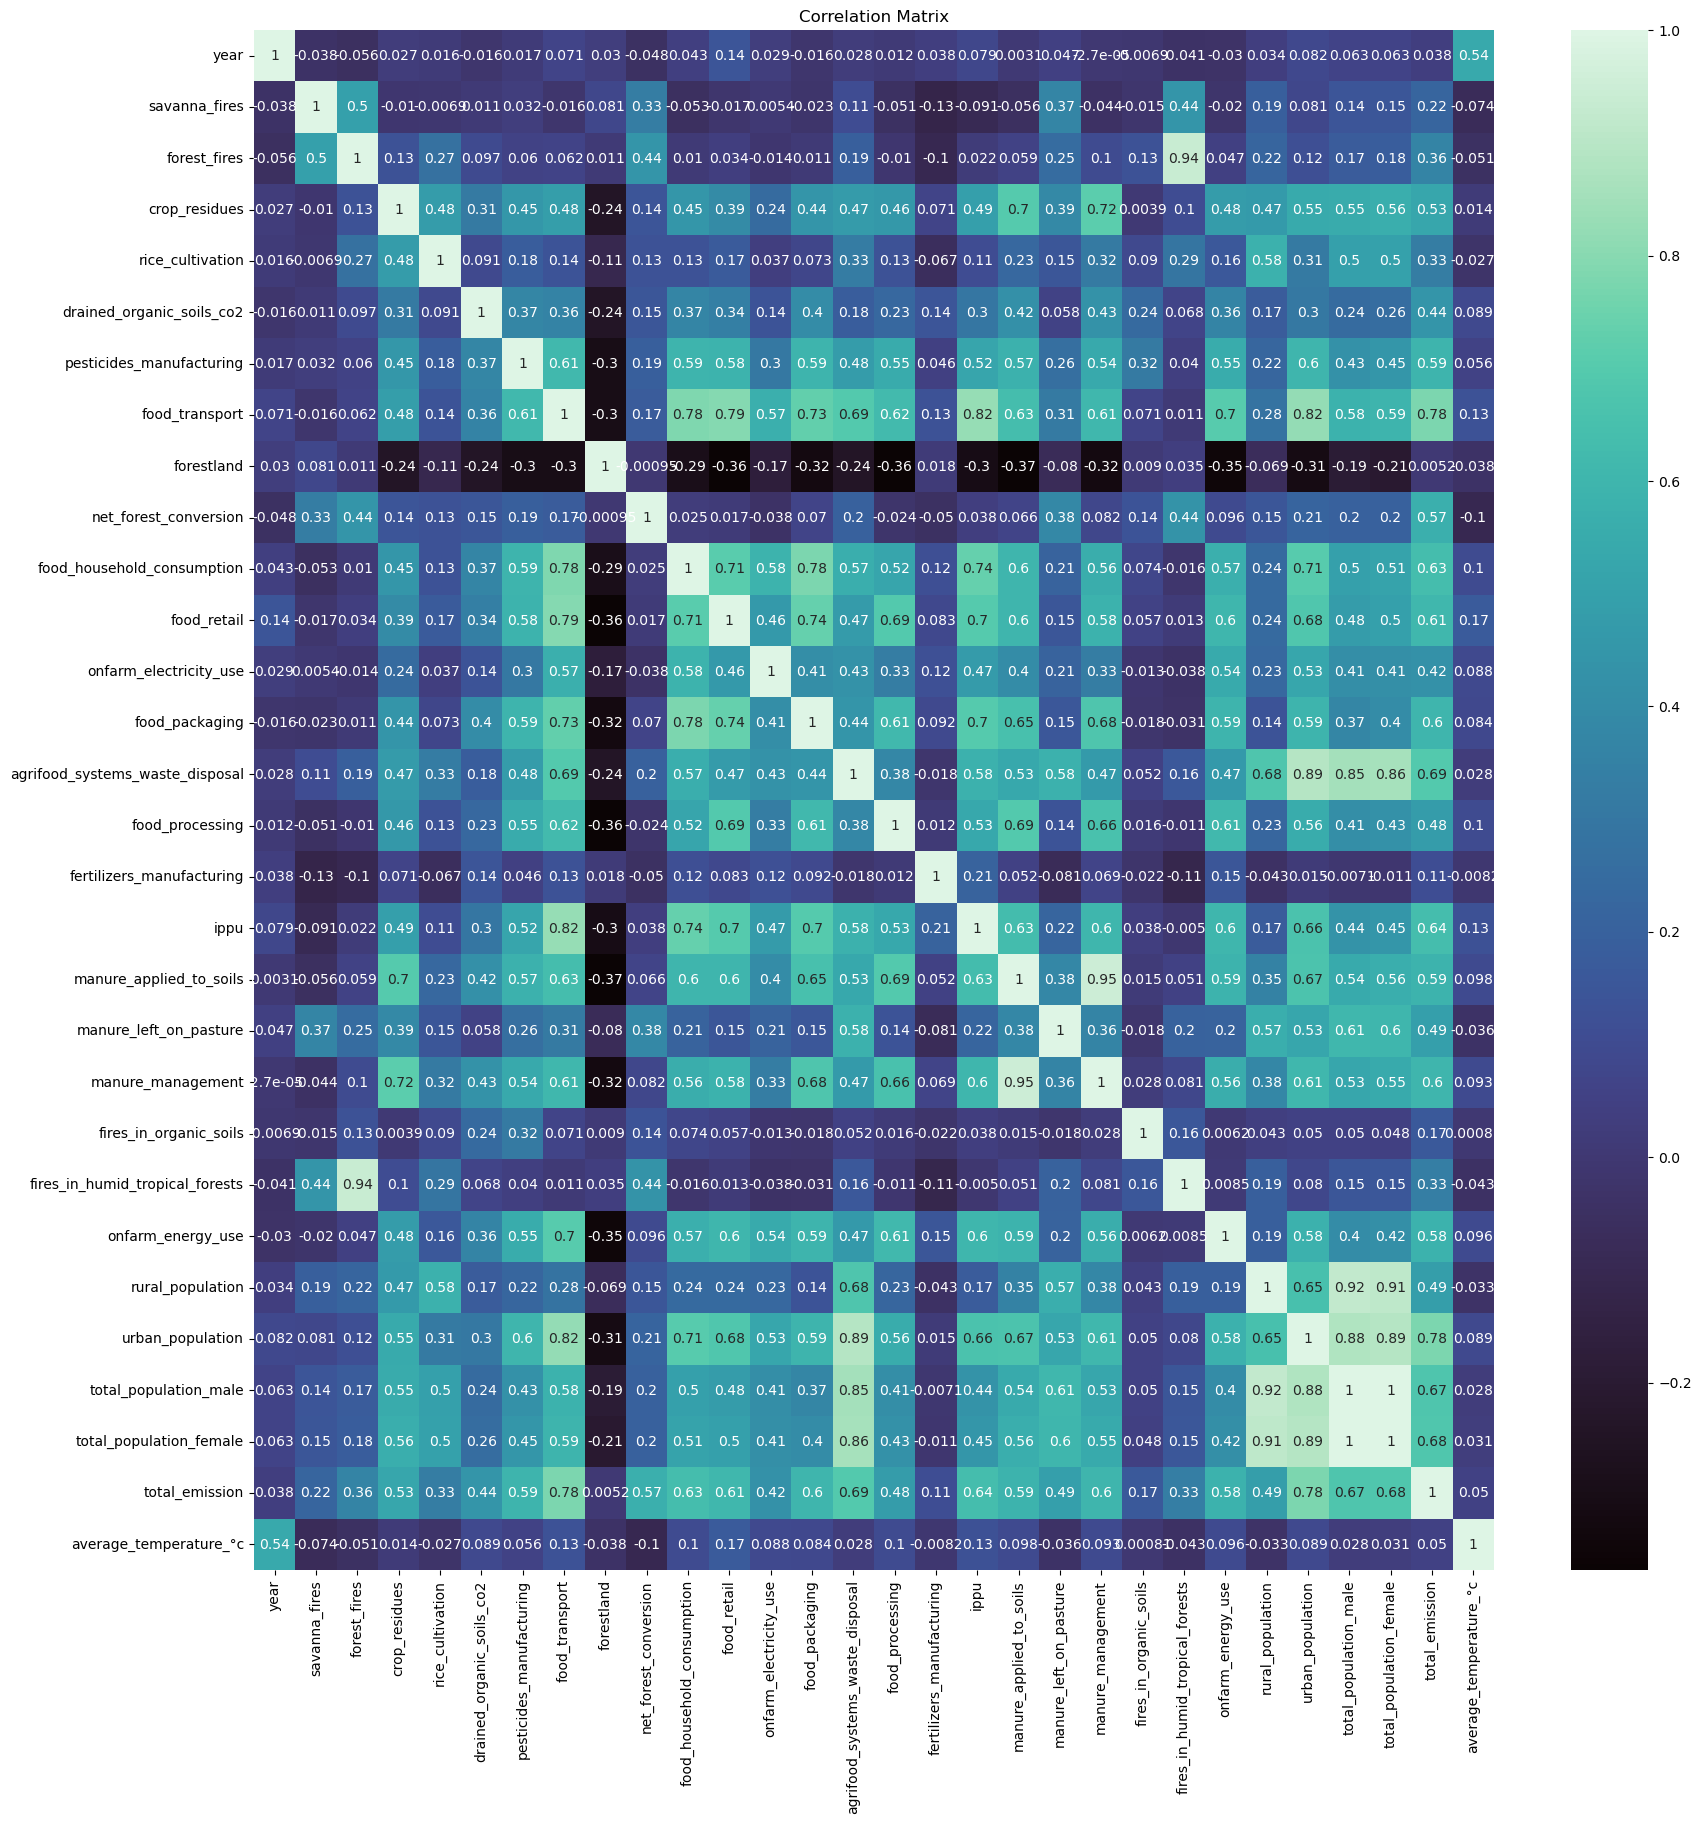

In [102]:
# Select only numeric columns
numeric_df = cleaned_df.select_dtypes(include = ['float64', 'int64'])

# Calculate the correlation matrix
plt.figure(figsize = (20, 20))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'mako')
plt.title('Correlation Matrix')
plt.show()

#### Insights:

Strong Positive Correlations: Pesticides Manufacturing and Fertilizers Manufacturing: These two variables are highly correlated, indicating that regions with high pesticide use also tend to have high fertilizer use. Urban Population and Total Population: A strong positive correlation suggests that areas with larger urban populations also have larger total populations.

Strong Negative Correlations: Forest Fires and Total Precipitation: Indicates that higher precipitation is associated with fewer forest fires. Net Forest Conversion and Forestland: Suggests that regions with significant deforestation have less forestland.
Moderaderate Positive Correlations: Food Transport and Food Household Consumption: Indicates that higher food transport emissions are associated with higher household food consumption. On-farm Electricity Use and Food Packaging: Suggests that regions with higher on-farm electricity use also have higher food packaging emissions.

Moderate Negative Correlations: Savanna Fires and Forestland: Indicates that regions with more savanna fires tend to have less forestland. Drained Organic Soils (CO2) and Forestland: Suggests that areas with higher CO2 emissions from drained organic soils have less forestland.

---
<a href=#seven></a>
## **7. Data Transformation**
<a href=#cont>Back to Table of Contents</a>

---

To ensure equal contribution of features, scaling is applied to the predictor variables. Scaling ensures that all features contribute equally, preventing bias toward features with larger magnitudes.

In [40]:
# Extract features and target variable

y = cleaned_df['average_temperature_°c']
x = cleaned_df.drop(columns = ['average_temperature_°c', 'area'], axis = 1)

In [42]:
# Create scaler object

scaler = StandardScaler()

In [44]:
# Create scaled version of the predictors

x_scaled = scaler.fit_transform(x)

In [46]:
# Convert the scaled predictor values into a DataFrame

x_standardised = pd.DataFrame(x_scaled, columns = x.columns)
x_standardised.head()

year  savanna_fires  forest_fires  crop_residues  rice_cultivation  \
0 -1.700330      -0.304184     -0.249674      -0.430041         -0.235028   
1 -1.587356      -0.304184     -0.249674      -0.424050         -0.236403   
2 -1.474382      -0.304184     -0.249674      -0.444015         -0.235028   
3 -1.361407      -0.304184     -0.249674      -0.391214         -0.235028   
4 -1.248433      -0.304184     -0.249674      -0.373916         -0.231592   

   drained_organic_soils_co2  pesticides_manufacturing  food_transport  \
0                  -0.325245                 -0.354640       -0.426074   
1                  -0.325245                 -0.354932       -0.426855   
2                  -0.325245                 -0.354932       -0.430096   
3                  -0.325245                 -0.354932       -0.429667   
4                  -0.325245                 -0.354932       -0.429820   

   forestland  net_forest_conversion  food_household_consumption  food_retail  \
0     0.19233              -0.422883                   -0.448525    -0.372424   
1     0.19233              -0.422883                   -0.448184    -0.369343   
2     0.19233              -0.422883                   -0.448115    -0.365184   
3     0.19233              -0.422883                   -0.447070    -0.384771   
4     0.19233              -0.422883                   -0.446161    -0.380854   

   onfarm_electricity_use  food_packaging  agrifood_systems_waste_disposal  \
0               -0.342111       -0.365646                        -0.354094   
1               -0.344191       -0.365646                        -0.350626   
2               -0.345756       -0.365646                        -0.344639   
3               -0.345911       -0.365646                        -0.335848   
4               -0.346398       -0.365646                        -0.328561   

   food_processing  fertilizers_manufacturing      ippu  \
0        -0.261172                  -0.838258 -0.545728   
1        -0.261172                  -0.837831 -0.545218   
2        -0.261172                  -0.837512 -0.544852   
3        -0.261172                  -0.837231 -0.546361   
4        -0.261172                  -0.836696 -0.547727   

   manure_applied_to_soils  manure_left_on_pasture  manure_management  \
0                -0.282653               -0.137080          -0.445920   
1                -0.271771               -0.117203          -0.433775   
2                -0.276695               -0.118314          -0.430197   
3                -0.280628               -0.121457          -0.428532   
4                -0.273063               -0.107631          -0.420455   

   fires_in_organic_soils  fires_in_humid_tropical_forests  onfarm_energy_use  \
0               -0.072046                        -0.235138           0.615978   
1               -0.072046                        -0.235138           0.615978   
2               -0.072046                        -0.235138           0.615978   
3               -0.072046                        -0.235138           0.615978   
4               -0.072046                        -0.235138           0.615978   

   rural_population  urban_population  total_population_male  \
0          0.228308         -0.337457              -0.112984   
1          0.268219         -0.324615              -0.111066   
2          0.321294         -0.307730              -0.059898   
3          0.381129         -0.288656               0.016217   
4          0.438848         -0.270018               0.073184   

   total_population_female  total_emission  
0                -0.117631       -0.565345  
1                -0.115608       -0.562548  
2                -0.064093       -0.561822  
3                 0.012088       -0.561549  
4                 0.068721       -0.558587

---
<a href=#eight></a>
## **8. Modelling and Evaluation**
<a href=#cont>Back to Table of Contents</a>

---

In [49]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x_standardised, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5122, 29), (1281, 29), (5122,), (1281,))

### 8.1. Linear Regression

In [51]:
# Train the model
model_lg = LinearRegression().fit(x_train, y_train)

# Make predictions
y_pred_lg = model_lg.predict(x_test)

# Evaluate the model
mae_lg = mean_absolute_error(y_test, y_pred_lg)
rmse_lg = np.sqrt(mean_squared_error(y_test, y_pred_lg))
r2_lg = r2_score(y_test, y_pred_lg)

In [53]:
# Print model evaluation results

print(f'MAE: {mae_lg} \nRMSE: {rmse_lg} \nR²: {r2_lg}')

MAE: 0.32975453480370803 
RMSE: 0.43019440475162446 
R²: 0.35327074732574115


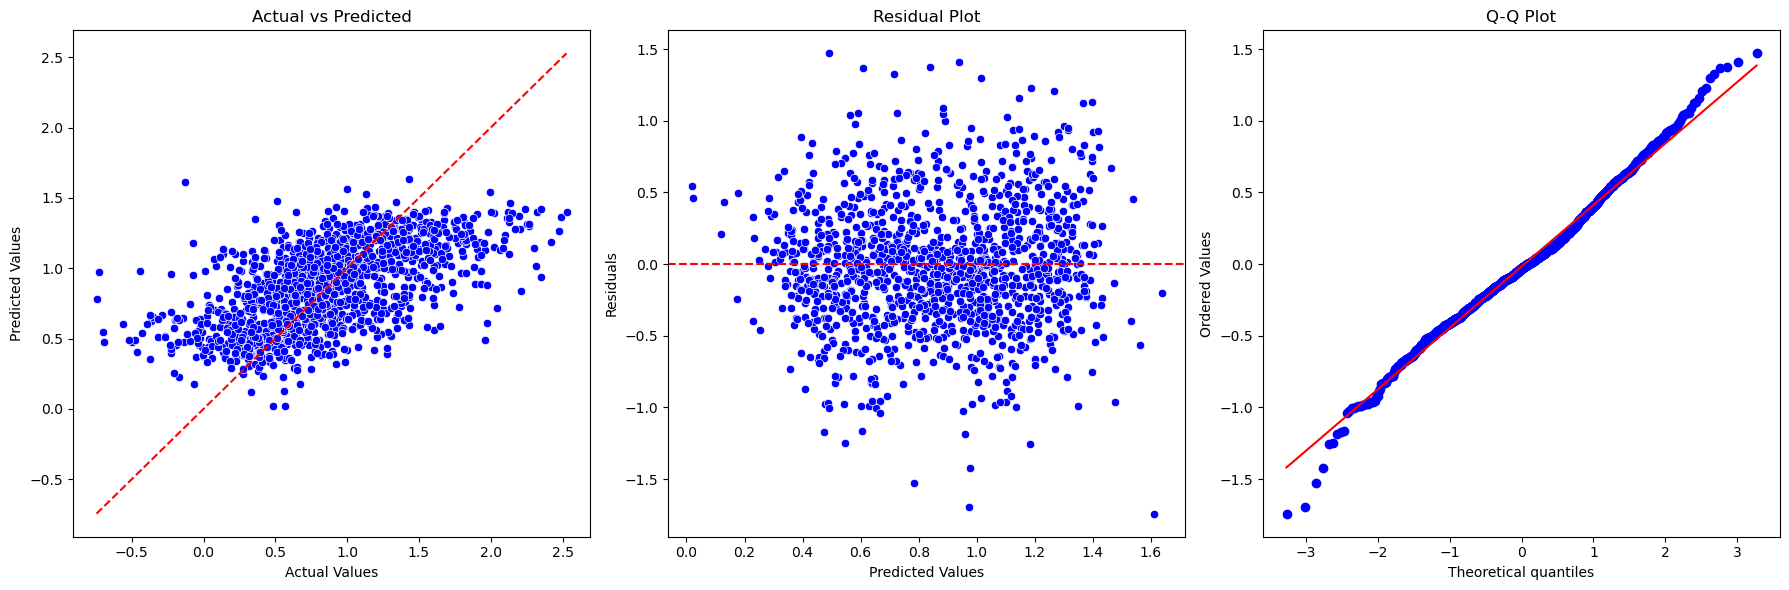

In [190]:
# Calculate residuals
residuals = y_test - y_pred_lg

# Create subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# 1. Actual vs Predicted Values
sns.scatterplot(x = y_test, y = y_pred_lg, ax = axes[0], color = 'blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')   
axes[0].set_title('Actual vs Predicted')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

# 2. Residual Plot
sns.scatterplot(x = y_pred_lg, y = residuals, ax = axes[1], color = 'blue')
axes[1].axhline(0, color = 'red', linestyle = '--')
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# 3. Q-Q Plot
stats.probplot(residuals, dist = "norm", plot = axes[2])
axes[2].set_title('Q-Q Plot')

# Adjust layout
plt.tight_layout()
plt.show()

Applying regualrization to prevent overfitting and posibly improve model performance.

In [58]:
# LASSO Regularization

# Define a Lasso Regression model
lasso = Lasso(max_iter = 10000)  

In [60]:
# Define the hyperparameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [62]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [64]:
# Retrieve the best model from the grid search
best_lasso = grid_search.best_estimator_

# Predict on the test set
y_pred_lasso = best_lasso.predict(x_test)

In [68]:
# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

In [70]:
# Print model evaluation results

print("Best Lasso alpha:", grid_search.best_params_['alpha'])
print(f'MAE: {mae_lasso} \nRMSE: {rmse_lasso} \nR²: {r2_lasso}')

Best Lasso alpha: 0.01
MAE: 0.33131142488320486 
RMSE: 0.43170713776759767 
R²: 0.34871444079708724


In [72]:
# Feature importance (coefficients)

feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': best_lasso.coef_
}).sort_values(by = 'Coefficient', key = abs, ascending = False)

In [74]:
print("\nFeature Importance (Lasso Coefficients):")
print(feature_importance)


Feature Importance (Lasso Coefficients):
                            Feature  Coefficient
0                              year     0.270447
9             net_forest_conversion    -0.040718
23                onfarm_energy_use     0.033712
20                manure_management     0.031888
5         drained_organic_soils_co2     0.029518
3                     crop_residues    -0.026939
16        fertilizers_manufacturing    -0.021057
24                 rural_population    -0.016787
7                    food_transport     0.014529
19           manure_left_on_pasture    -0.011905
18          manure_applied_to_soils     0.010812
4                  rice_cultivation    -0.002939
12           onfarm_electricity_use     0.002075
27          total_population_female    -0.000000
26            total_population_male    -0.000000
25                 urban_population     0.000000
22  fires_in_humid_tropical_forests     0.000000
21           fires_in_organic_soils    -0.000000
14  agrifood_systems_waste_

The RMSE (Root Mean Squared Error) values for your linear regression model (0.4302) and lasso regression model (0.4317) are very close, indicating that both models perform similarly in terms of prediction accuracy. Lasso regression introduces a penalty (L1 regularization) that shrinks coefficients of less relevant features to zero. This helps with feature selection and can improve generalization, especially when there are irrelevant or highly correlated features.

The slightly higher RMSE for lasso (0.4317) suggests that the regularization might have removed or reduced some coefficients that marginally contributed to better performance in the linear regression model.
However, this performance drop is minimal, so the regularization is not significantly harming predictive accuracy. The linear regression model's RMSE being slightly better suggests that all features contribute some predictive value in this specific dataset, and regularization isn't providing significant benefit.

We'll use the top 14 important features from the Lasso model to train the other models.

### 8.2. Random Forest Regressor

In [85]:
# Define the reduced set of independent variables
x_reduced = x_standardised[['year', 'net_forest_conversion', 'onfarm_energy_use', 'manure_management',
                            'drained_organic_soils_co2', 'fertilizers_manufacturing', 'rural_population',
                            'food_transport', 'manure_left_on_pasture', 'manure_applied_to_soils',
                            'rice_cultivation', 'onfarm_electricity_use', 'crop_residues']]

In [89]:
# Split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size = 0.2, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5122, 13), (1281, 13), (5122,), (1281,))

In [91]:
# Train the model
model_rf = RandomForestRegressor(random_state = 42).fit(x_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(x_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [105]:
# print model results

print(f'MAE: {mae_rf} \nRMSE: {rmse_rf} \nR²: {r2_rf}')

MAE: 0.25873602180508065 
RMSE: 0.35406811447236314 
R²: 0.5619066844949374


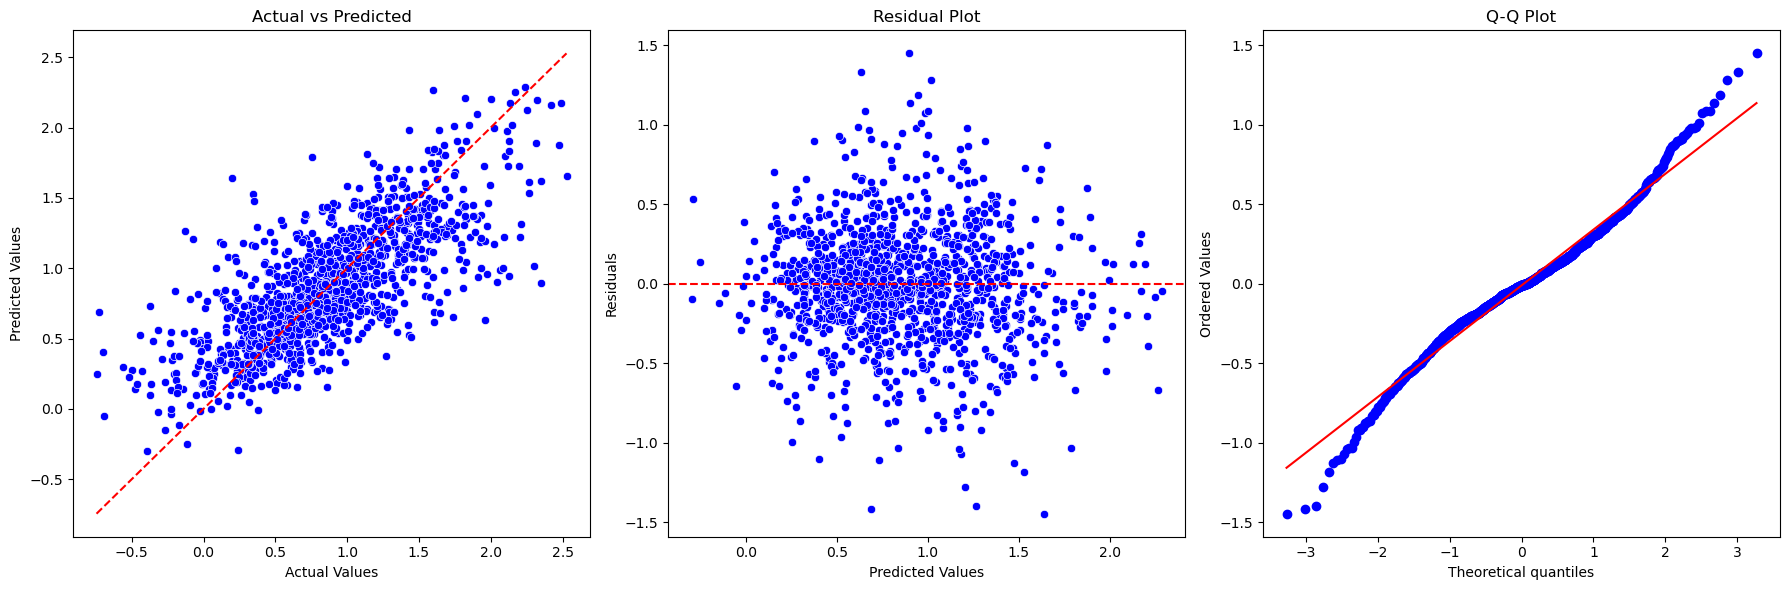

In [97]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Create subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# 1. Actual vs Predicted Values
sns.scatterplot(x = y_test, y = y_pred_rf, ax = axes[0], color = 'blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')   
axes[0].set_title('Actual vs Predicted')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

# 2. Residual Plot
sns.scatterplot(x = y_pred_rf, y = residuals, ax = axes[1], color = 'blue')
axes[1].axhline(0, color = 'red', linestyle = '--')
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# 3. Q-Q Plot
stats.probplot(residuals, dist = "norm", plot = axes[2])
axes[2].set_title('Q-Q Plot')

# Adjust layout
plt.tight_layout()
plt.show()

### 8.3. Gradient Boosting Regressor

In [99]:
# Train the model
model_gb = GradientBoostingRegressor(random_state = 42).fit(x_train, y_train)

# Make predictions
y_pred_gb = model_gb.predict(x_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

In [107]:
# print model results

print(f'MAE: {mae_gb} \nRMSE: {rmse_gb} \nR²: {r2_gb}')

MAE: 0.2833549969814485 
RMSE: 0.37927382756677 
R²: 0.497311743905144


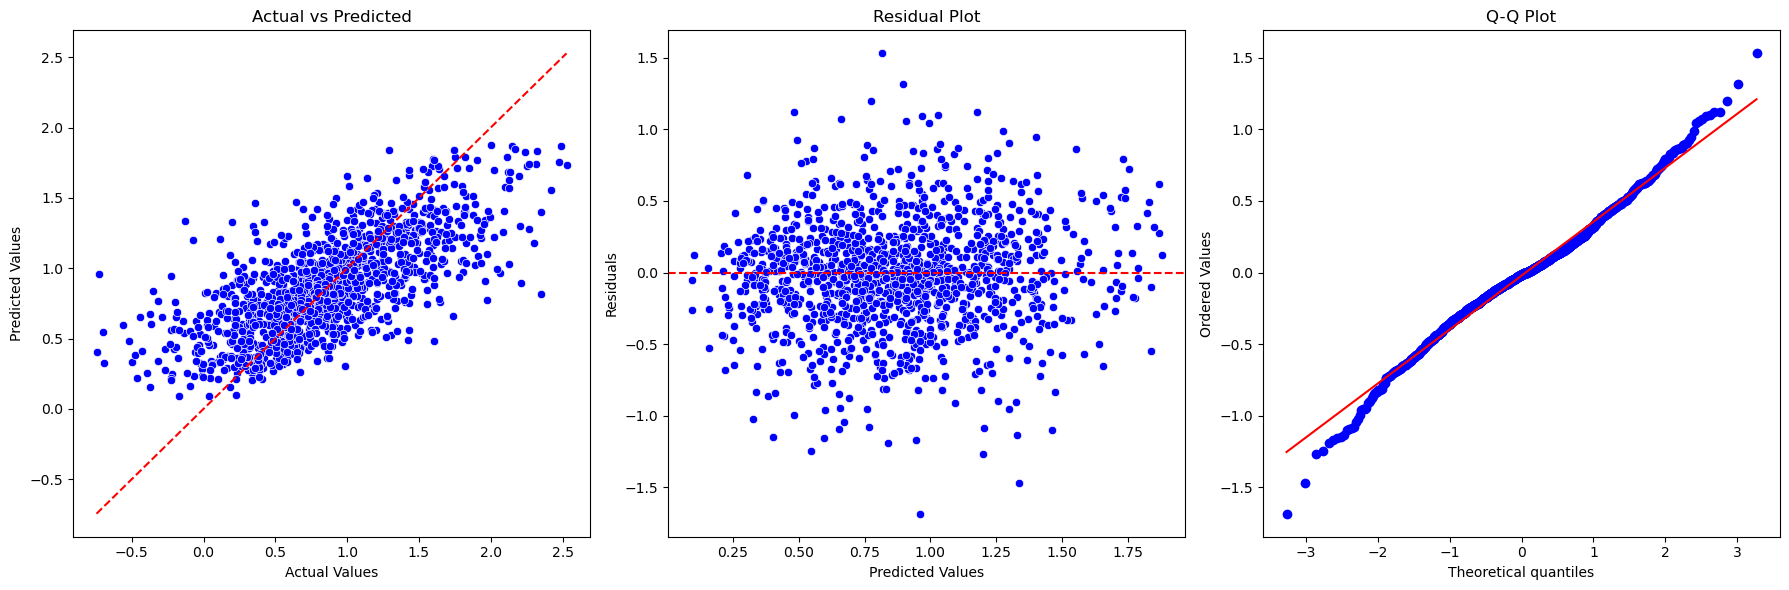

In [109]:
# Calculate residuals
residuals = y_test - y_pred_gb

# Create subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# 1. Actual vs Predicted Values
sns.scatterplot(x = y_test, y = y_pred_gb, ax = axes[0], color = 'blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')   
axes[0].set_title('Actual vs Predicted')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

# 2. Residual Plot
sns.scatterplot(x = y_pred_gb, y = residuals, ax = axes[1], color = 'blue')
axes[1].axhline(0, color = 'red', linestyle = '--')
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# 3. Q-Q Plot
stats.probplot(residuals, dist = "norm", plot = axes[2])
axes[2].set_title('Q-Q Plot')

# Adjust layout
plt.tight_layout()
plt.show()

---
<a href=#nine></a>
## **9. Final Model**
<a href=#cont>Back to Table of Contents</a>

---

In [111]:
# Best model 

# Compare R-squared scores
models = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor']
r2_scores = [r2_lg, r2_rf, r2_gb]

best_model_index = r2_scores.index(max(r2_scores))
best_model = models[best_model_index]

print("Best Model:", best_model)
print("R² Score:", max(r2_scores))

Best Model: Random Forest Regressor
R² Score: 0.5619066844949374


The best model is te random forest model. Now we apply hyperparameter tuning for a Random Forest model to optimize its parameters for improving model performance. 

In [117]:
# Hyperparameter turning for random forest regressor

# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state = 42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [10, 20, 30, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

In [119]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator = rf, 
    param_grid = param_grid, 
    scoring = 'neg_mean_squared_error',  # Use RMSE as the evaluation metric
    cv = 3,                              # 3-fold cross-validation
    verbose = 2,                         # Print progress
    n_jobs = -1                          # Use all available cores
)

In [121]:
# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [123]:
# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [125]:
# Evaluate the tuned model on the test data
y_pred = best_rf_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [127]:
# Print results

print("Best Hyperparameters:", best_params)
print(f'MAE: {mae} \nRMSE: {rmse} \nR²: {r2}')

Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
MAE: 0.2657426180701507 
RMSE: 0.36160101556790303 
R²: 0.543067263978106


In [129]:
# Retrieve feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by = 'Importance', ascending = False)

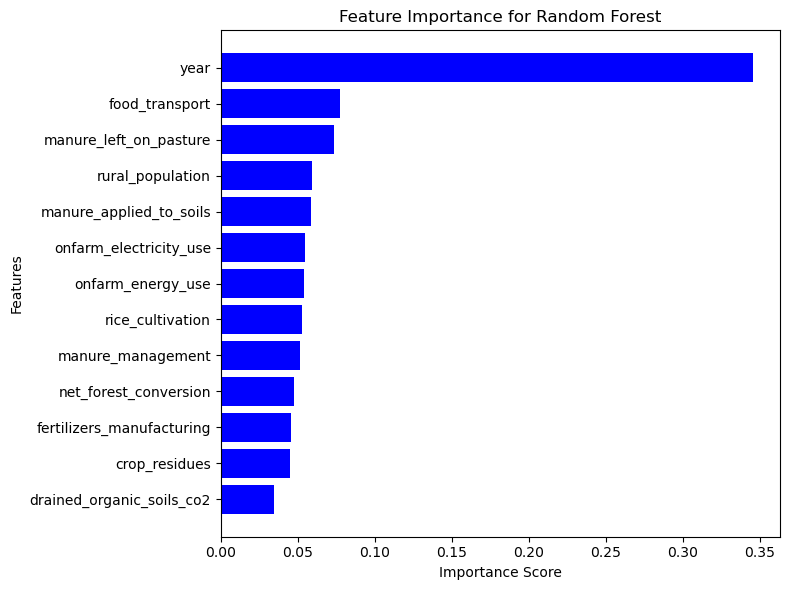

In [131]:
# Plot feature importance
plt.figure(figsize = (8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color = 'blue')
plt.gca().invert_yaxis() 
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

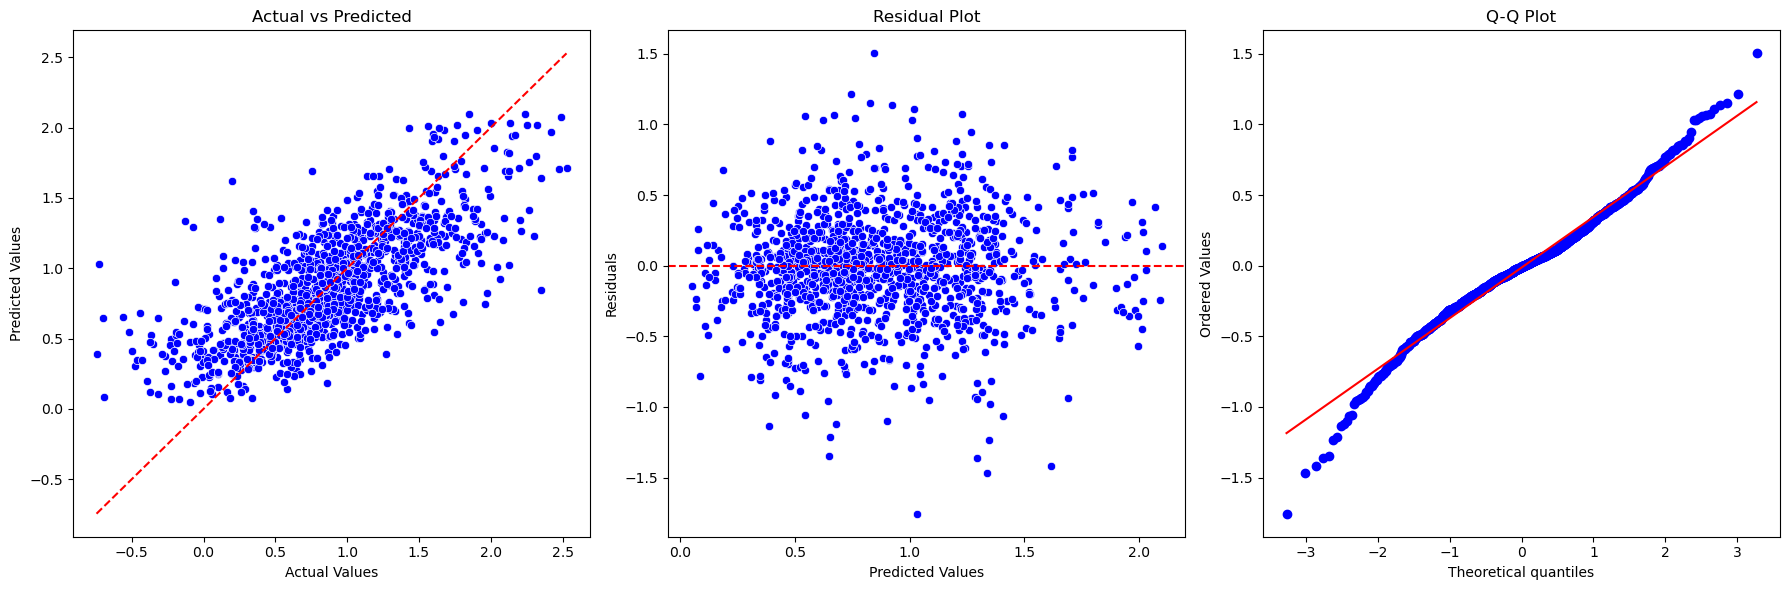

In [133]:
# Calculate residuals
residuals = y_test - y_pred

# Create subplots
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

# 1. Actual vs Predicted Values
sns.scatterplot(x = y_test, y = y_pred, ax = axes[0], color = 'blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'red', linestyle = '--')   
axes[0].set_title('Actual vs Predicted')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')

# 2. Residual Plot
sns.scatterplot(x = y_pred, y = residuals, ax = axes[1], color = 'blue')
axes[1].axhline(0, color = 'red', linestyle = '--')
axes[1].set_title('Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

# 3. Q-Q Plot
stats.probplot(residuals, dist = "norm", plot = axes[2])
axes[2].set_title('Q-Q Plot')

# Adjust layout
plt.tight_layout()
plt.show()

In [135]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [137]:
# Display the DataFrame
print(comparison_df)

        Actual  Predicted
3862  0.512667   1.024232
2170  0.812327   0.832044
4711  0.343333   0.862385
1553  0.506083   0.227426
5454  0.729750   0.429827
...        ...        ...
2712  0.650750   0.513405
596   0.536000   1.353688
2005  0.189333   0.253066
4997  0.683500   0.649769
4071  0.862667   0.698254

[1281 rows x 2 columns]


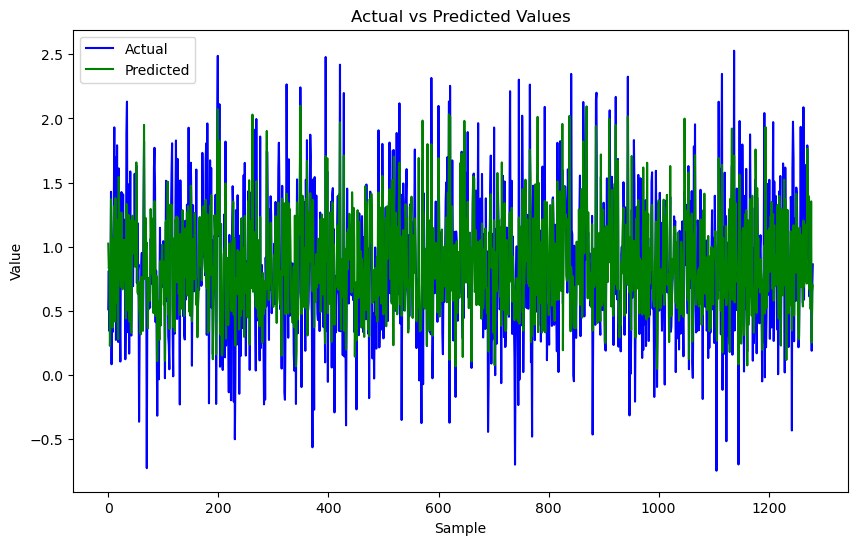

In [139]:
# Plotting the actual vs predicted values
plt.figure(figsize = (10, 6))
plt.plot(comparison_df['Actual'].values, label = 'Actual', color = 'blue')
plt.plot(comparison_df['Predicted'].values, label = 'Predicted', color = 'green')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.show()

---
<a href=#ten></a>
## **10. Conclusions and Future Work**
<a href=#cont>Back to Table of Contents</a>

---

The analysis revealed that the Random forest Regression model performed well, achieving a Mean Squared Error (MSE) of 0.366 and an R-squared (R2) score of 0.533, indicating reasonable predictions. The Gradient Boosting Regressor also demonstrated strong performance with an MSE of 0.376 and an R2 of 0.507. In contrast, the Linear Regressor showed significantly poorer performance, with an MSE of 0.430 and an R2 of 0.353. These findings suggest that Random Forest and Gradient Boosting regressors are effective for predicting the target variable in this dataset.

The results have practical implications for decision-making processes, particularly in fields where accurate predictions of emissions are crucial. The strong performance of the Random Forest regressor suggests that this technique can be reliably used for forecasting and planning purposes. This can impact policy-making, business strategies, and scientific research by providing robust tools for data-driven decision-making.

Future research could explore additional models and techniques, such as ensemble methods or deep learning approaches, to further improve prediction accuracy. Additionally, investigating the impact of different feature engineering techniques and hyperparameter tuning could yield better results. 